In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    RandomizedSearchCV,
    cross_val_score,
    cross_val_predict
)

from sklearn.metrics import (
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    precision_recall_curve
)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv("C:\\Users\\SRUTHI\\Downloads\\Data\\train.csv")

In [3]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
data.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [6]:
data.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [7]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
X = data.drop(['target','id'], axis=1)
y = data['target']

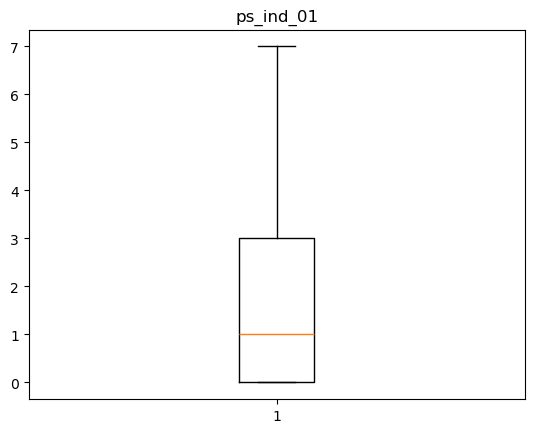

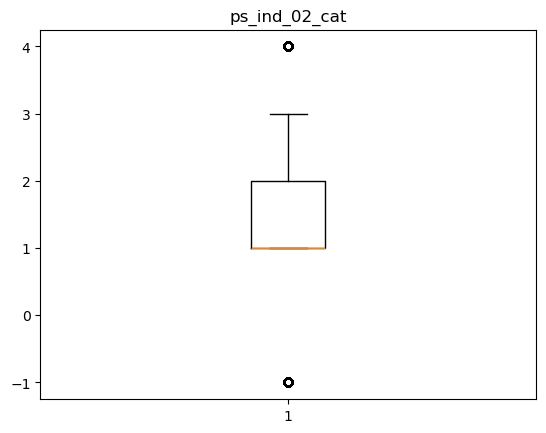

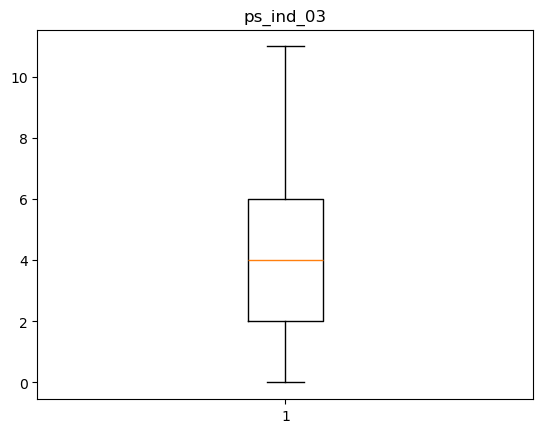

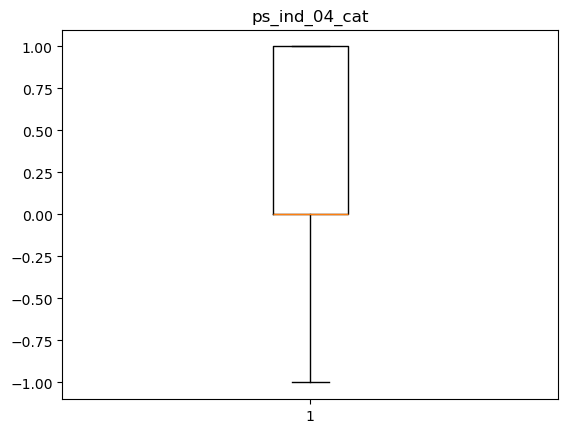

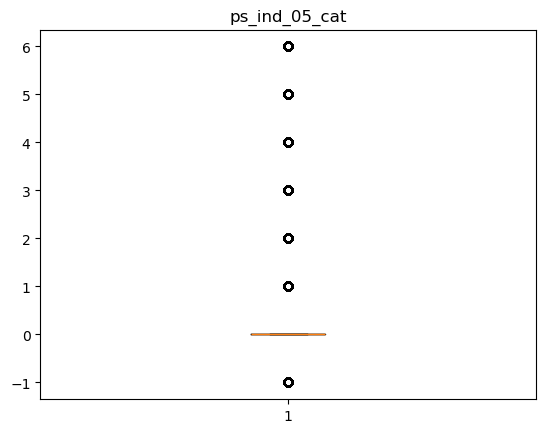

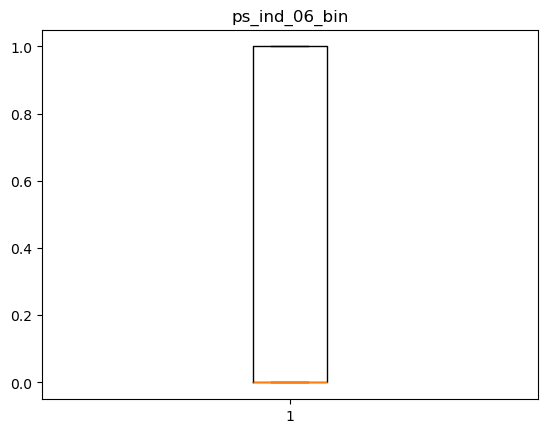

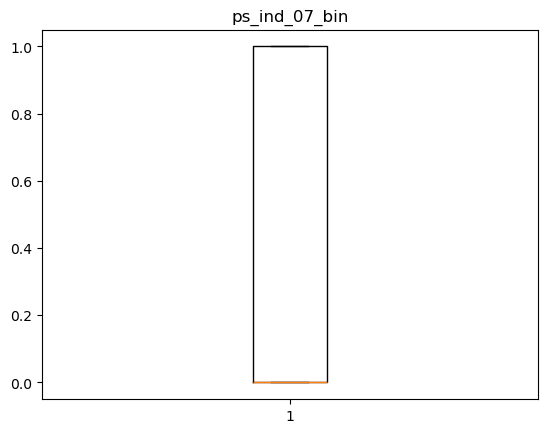

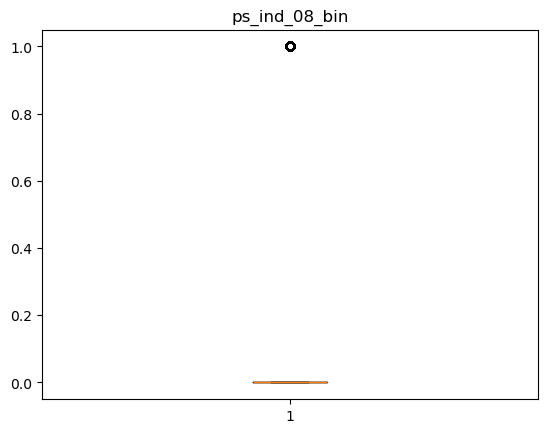

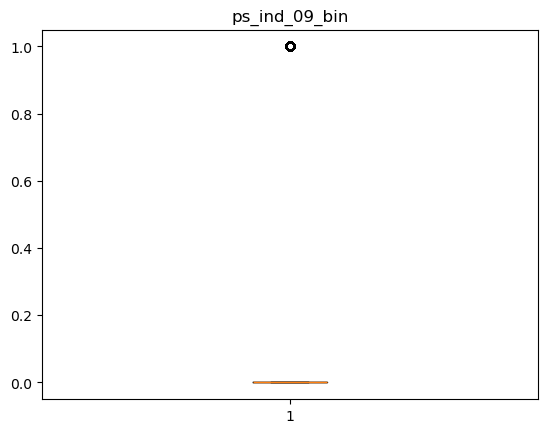

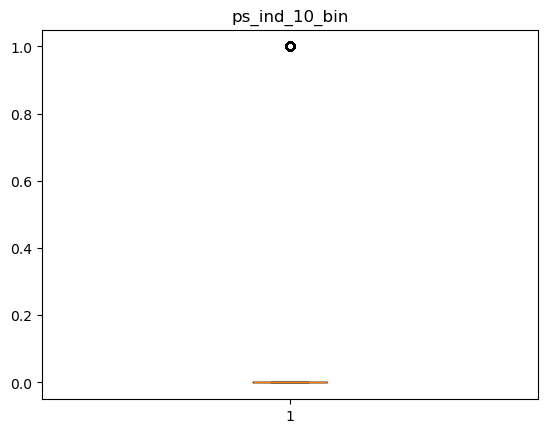

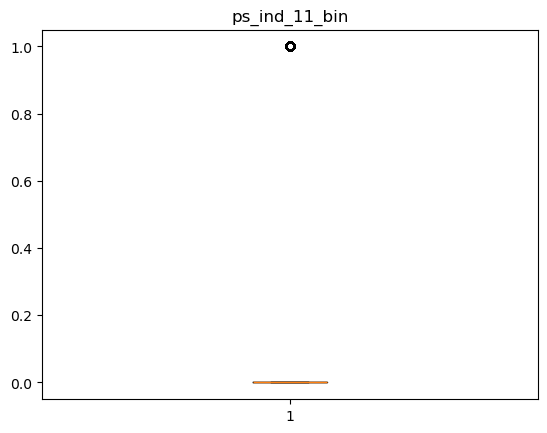

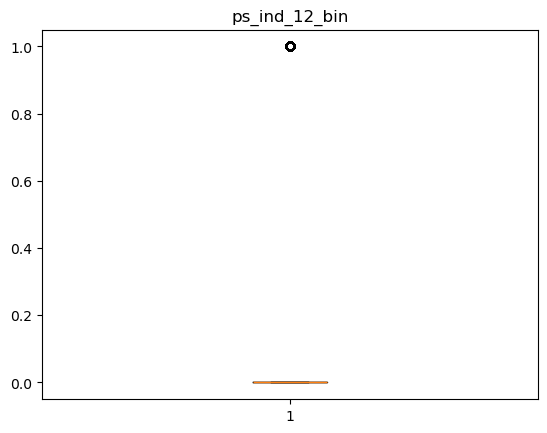

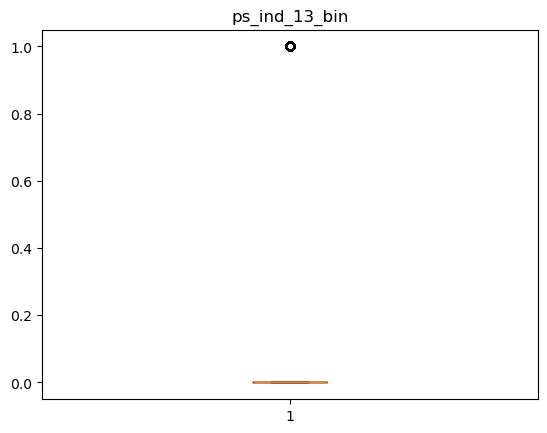

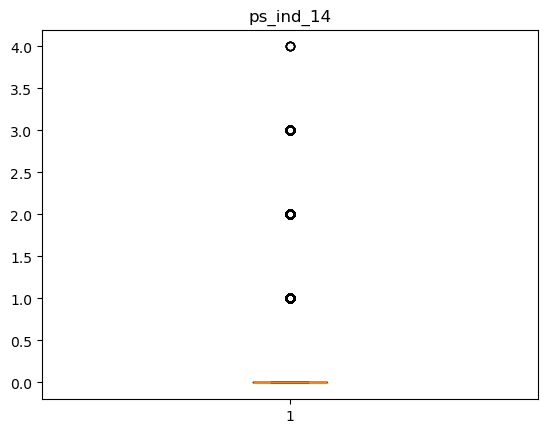

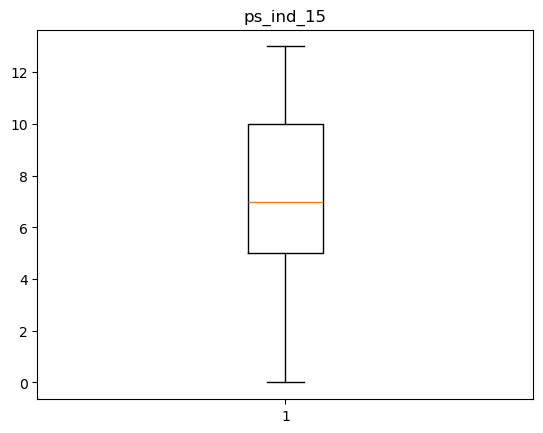

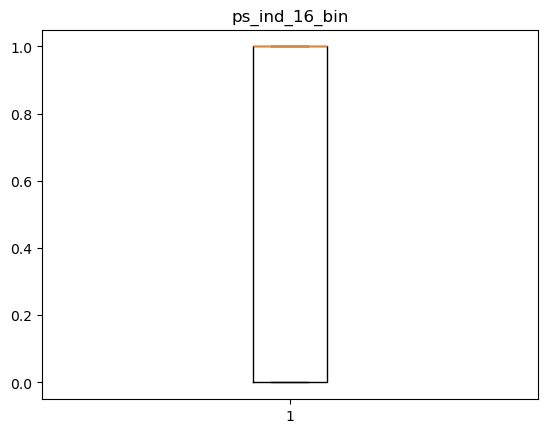

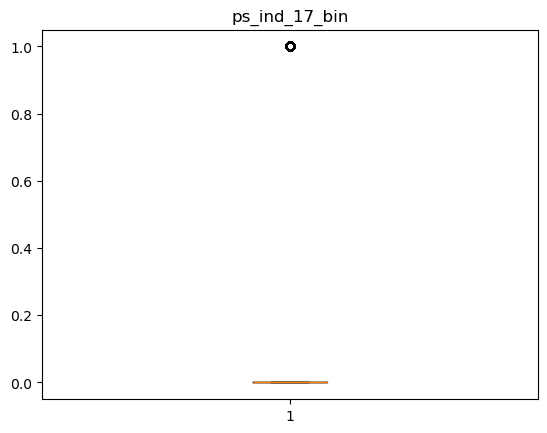

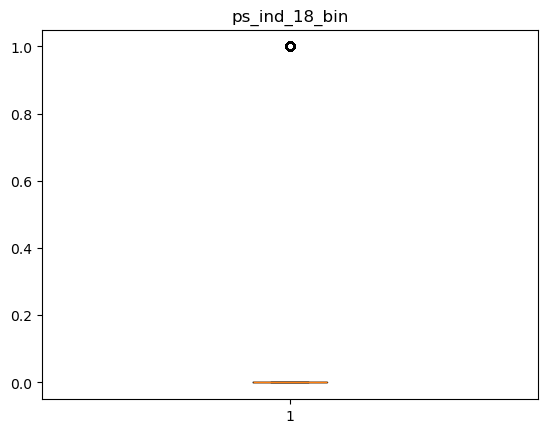

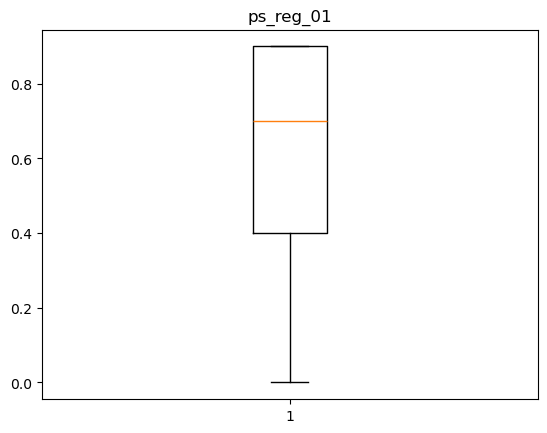

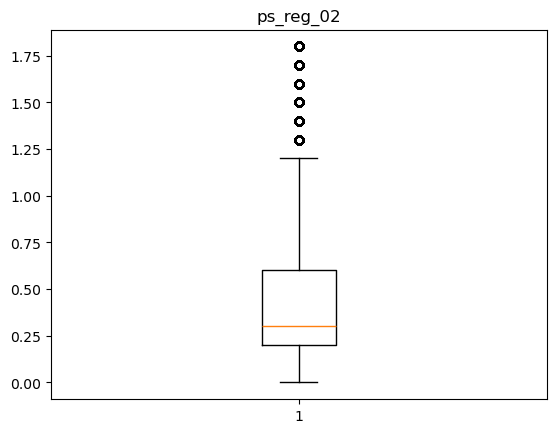

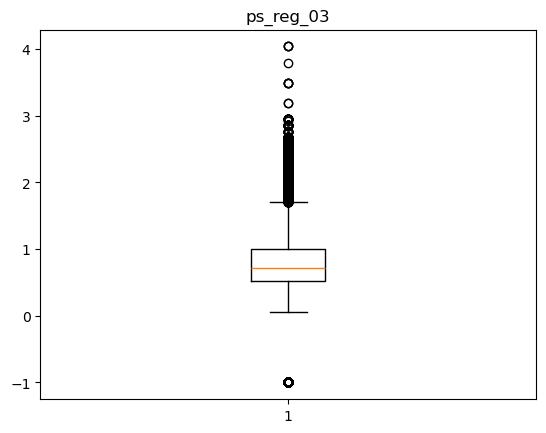

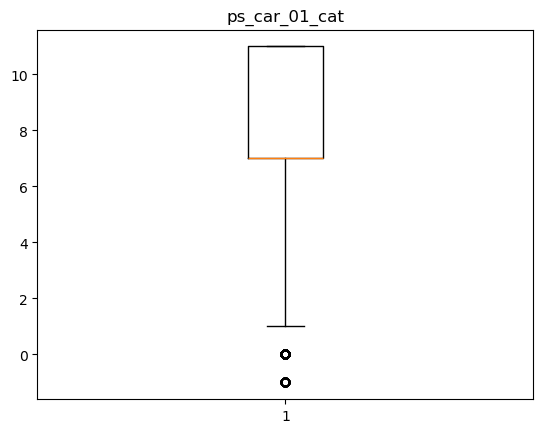

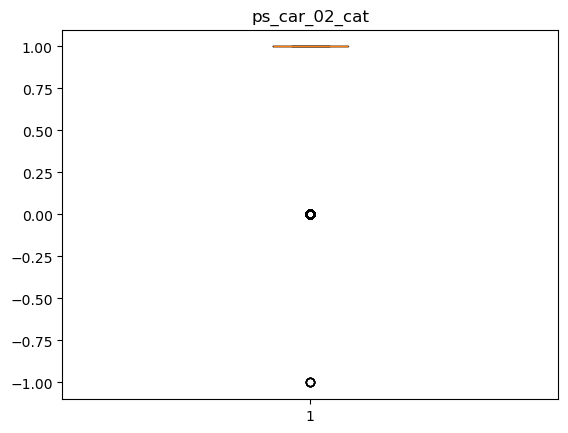

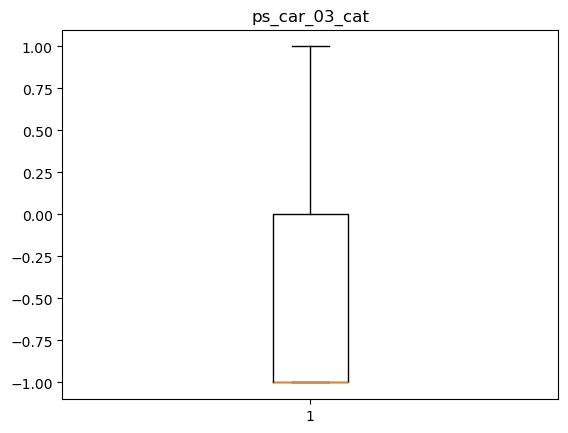

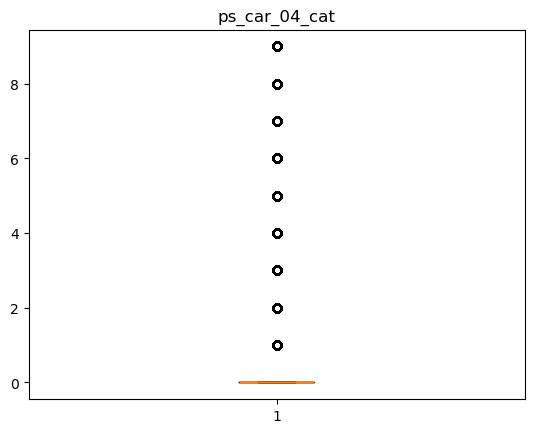

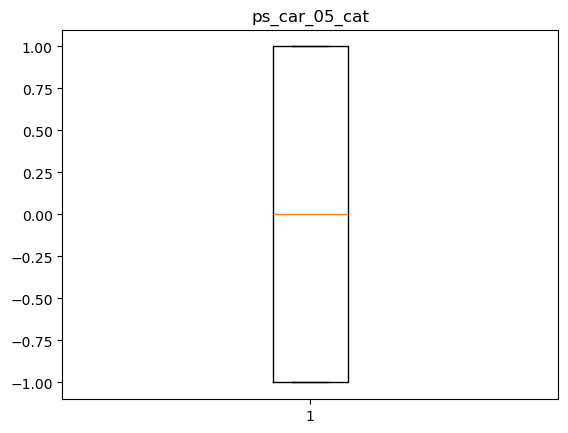

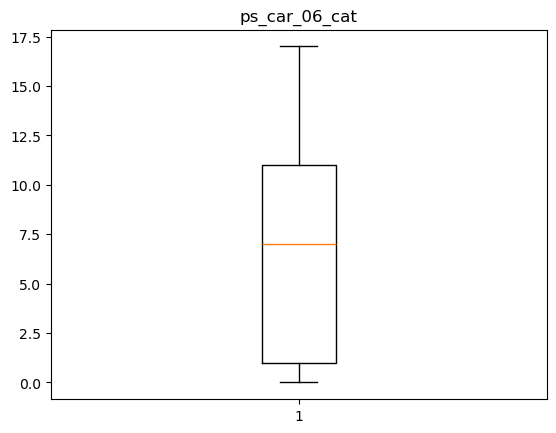

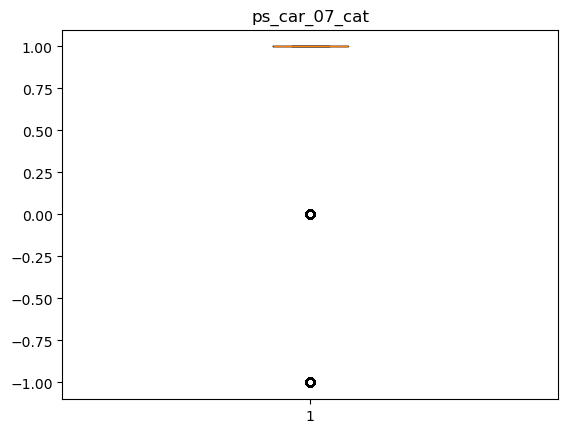

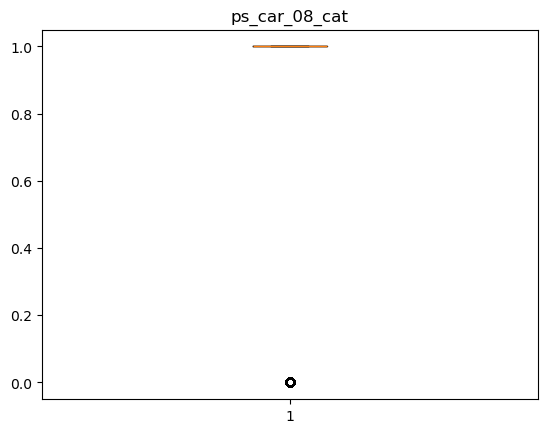

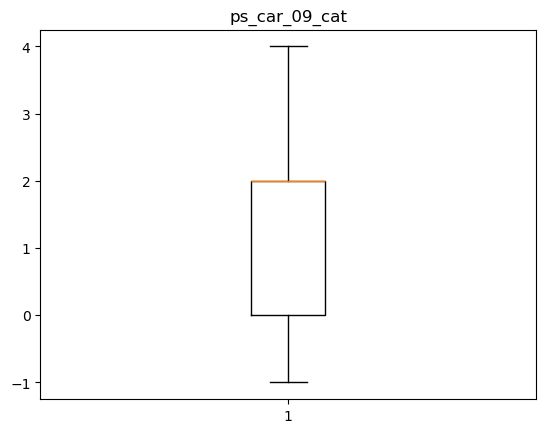

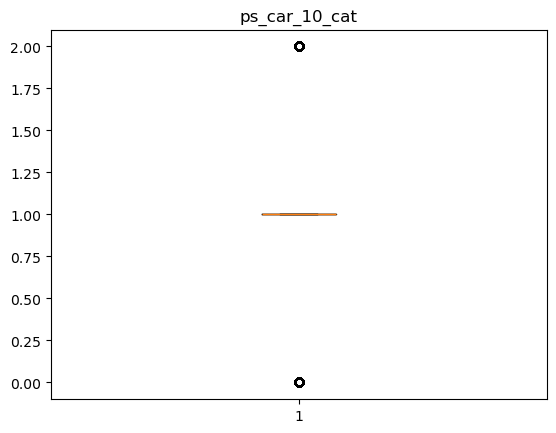

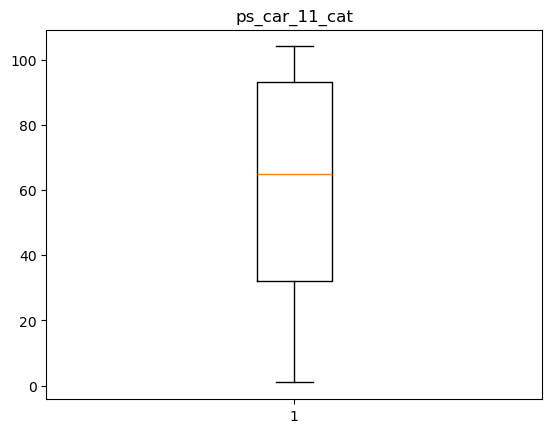

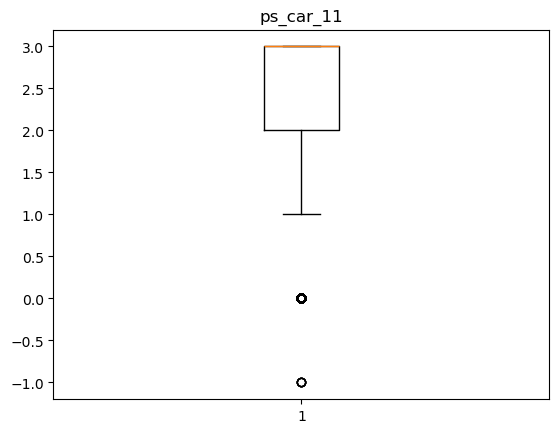

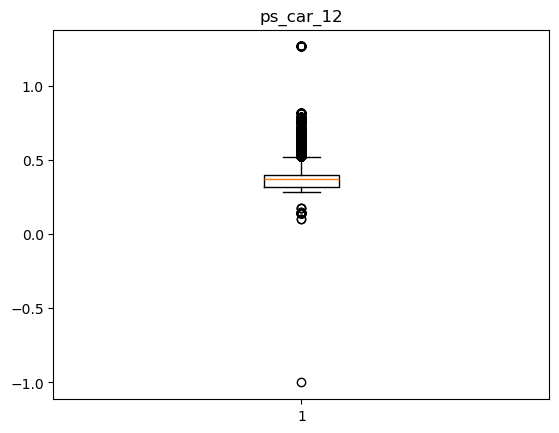

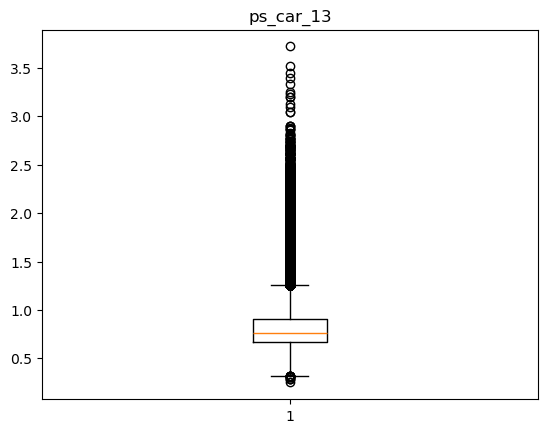

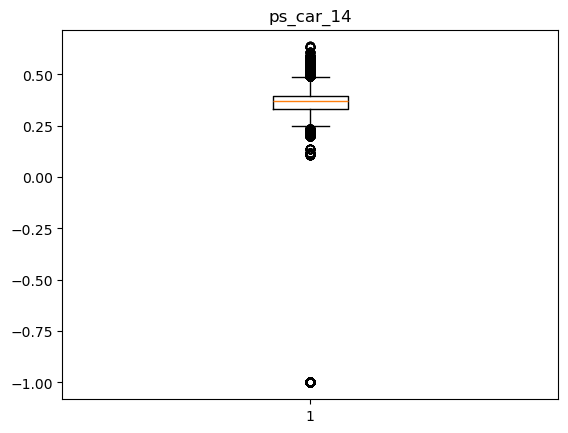

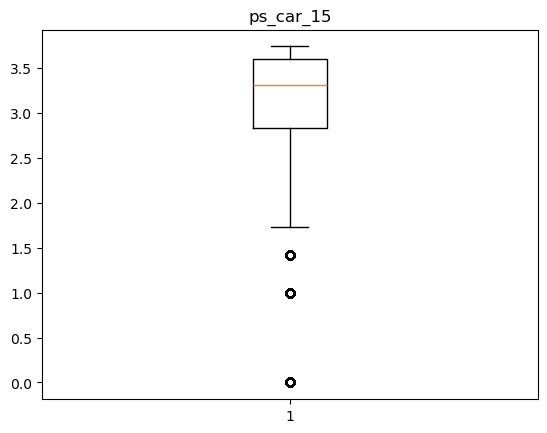

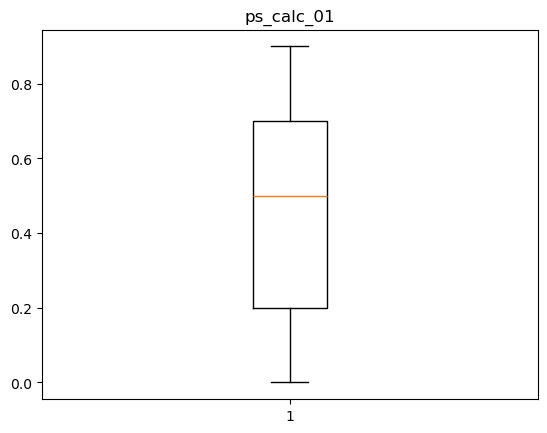

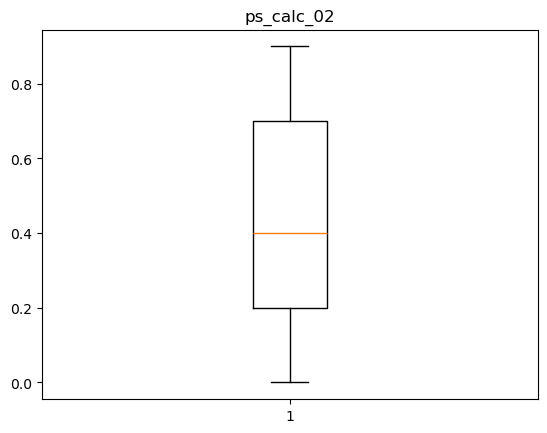

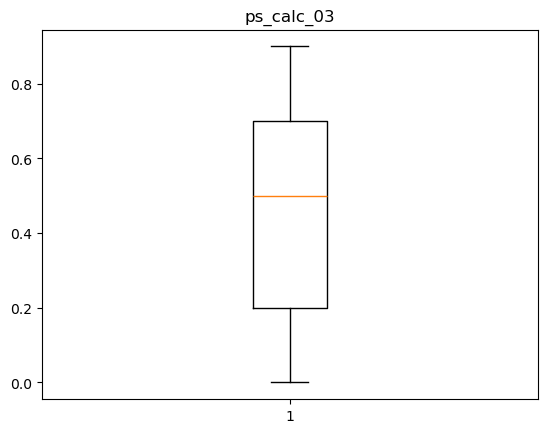

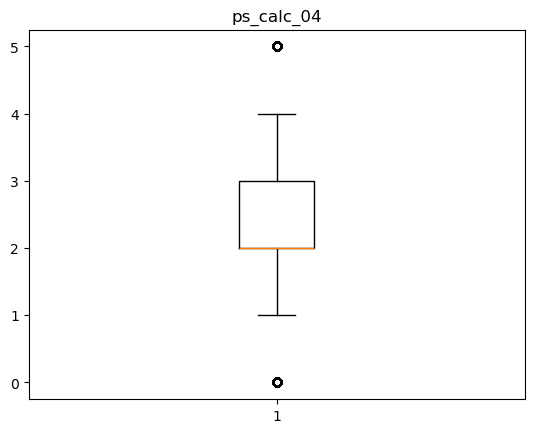

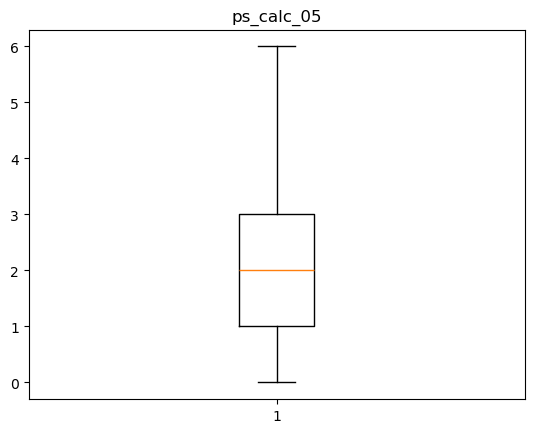

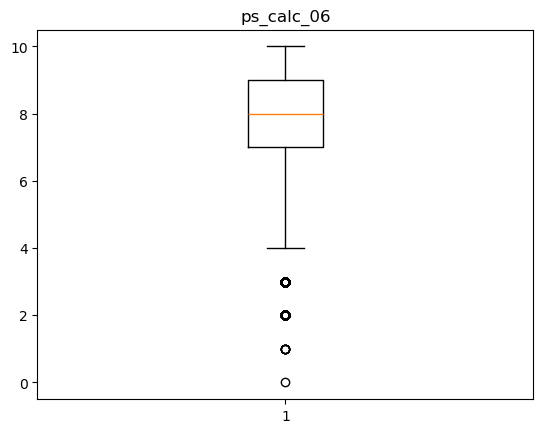

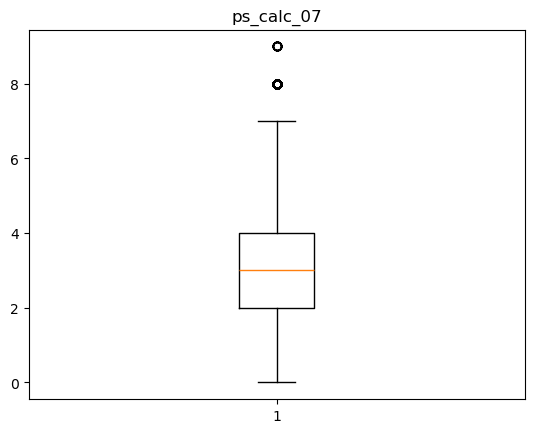

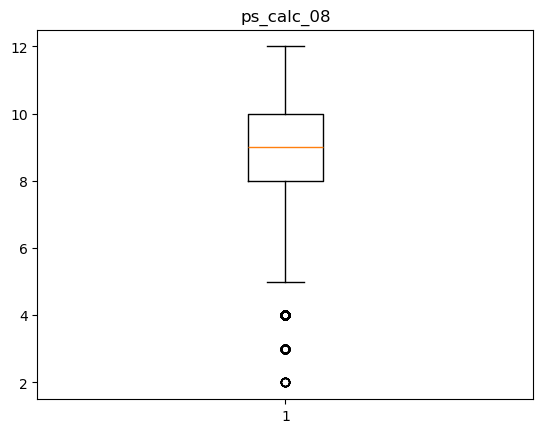

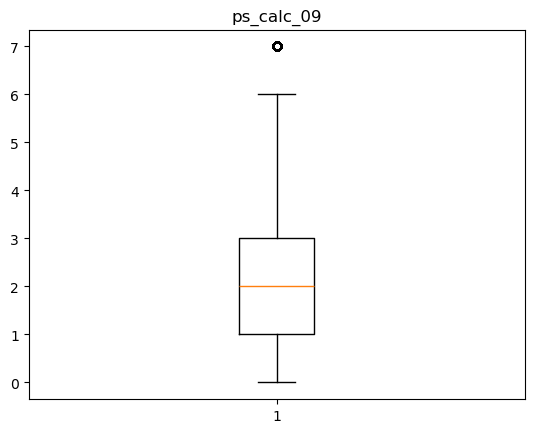

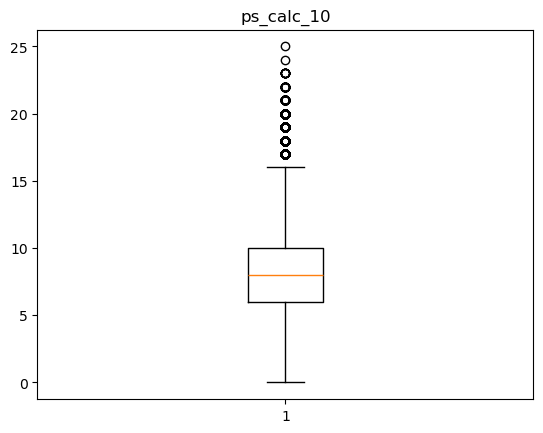

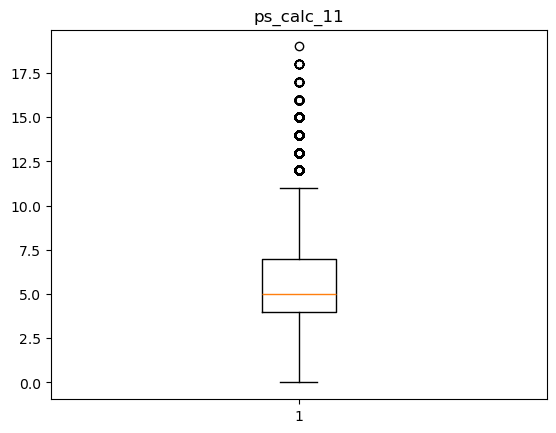

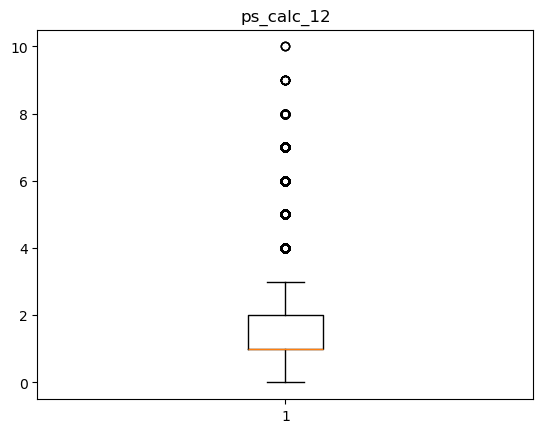

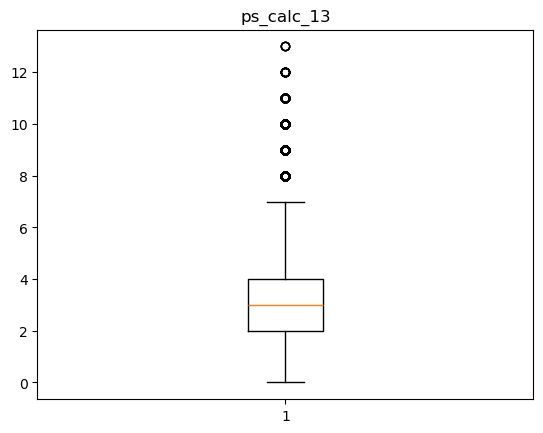

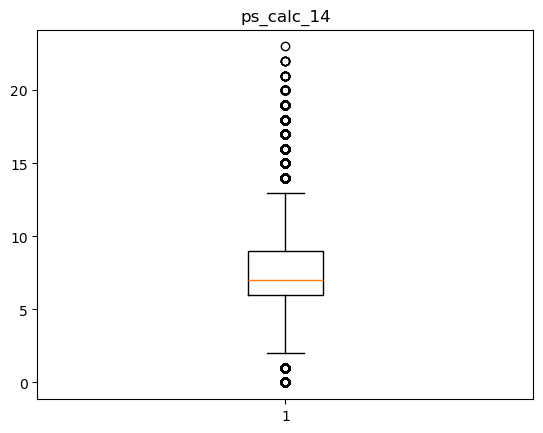

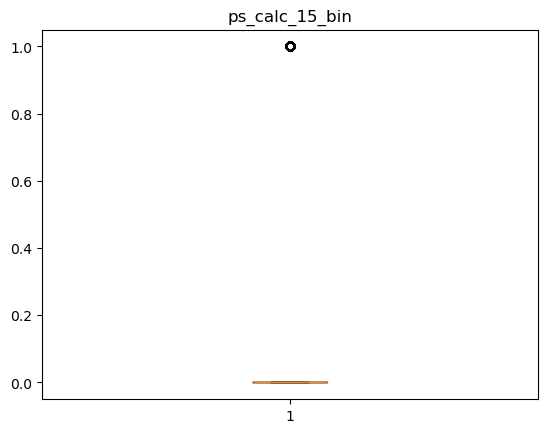

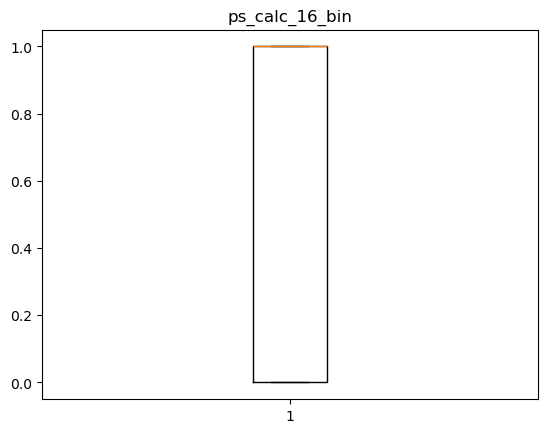

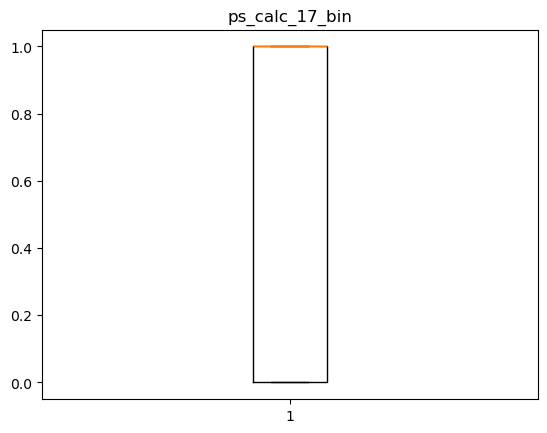

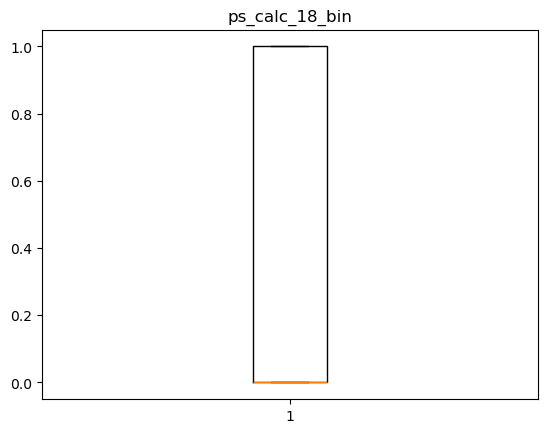

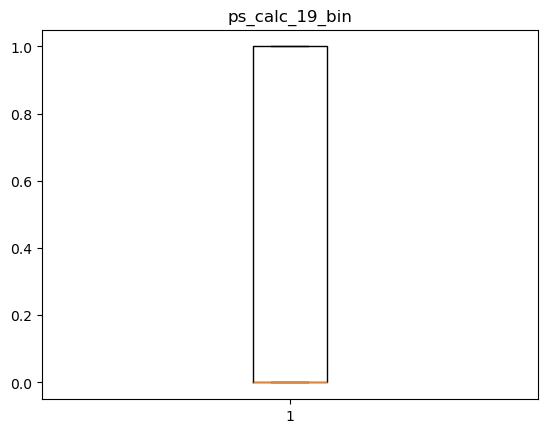

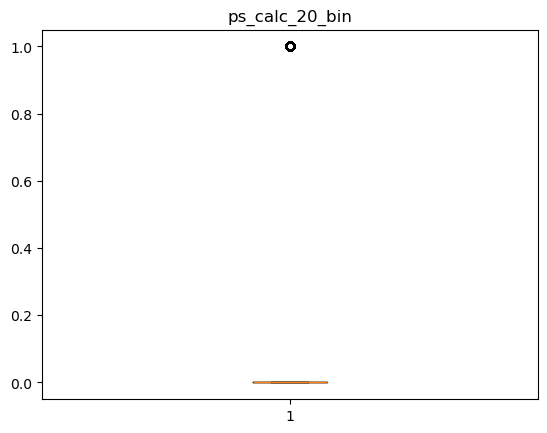

In [9]:
for col in X.columns[:]:
    plt.boxplot(X[col])
    plt.title(col)
    plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (476169, 57)
Test size: (119043, 57)


In [11]:
baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(X_train, y_train)

baseline_pred = baseline.predict(X_test)

print("Baseline F1:", f1_score(y_test, baseline_pred))

Baseline F1: 0.0


In [14]:
from xgboost import XGBClassifier

pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

models = {
    "Logistic_SMOTE": ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=2000))
    ]),
    
    "RF_class_weight": Pipeline([
        ('model', RandomForestClassifier(
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        ))
    ]),
    
    "XGBoost": XGBClassifier(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=pos_weight,
        random_state=42,
        eval_metric='auc',
        use_label_encoder=False,
        n_jobs=-1
    )
}



In [15]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for name, model in models.items():
    scores = cross_val_score(
        model,
        X_train,
        y_train,
        cv=cv,
        scoring='roc_auc',
        n_jobs=-1
    )
    results[name] = scores.mean()

results_df = pd.DataFrame.from_dict(
    results,
    orient='index',
    columns=['CV ROC-AUC']
).sort_values(by='CV ROC-AUC', ascending=False)

results_df



,CV ROC-AUC
XGBoost,0.620400
RF_class_weight,0.584374
Logistic_SMOTE,0.520481


In [16]:
best_model_name = results_df.index[0]
best_model = models[best_model_name]

print("Selected Model:", best_model_name)
 

Selected Model: XGBoost


In [17]:
if best_model_name == "XGBoost":
    
    params = {
        'n_estimators': [400, 600, 800],
        'max_depth': [4, 6, 8],
        'learning_rate': [0.03, 0.05, 0.1],
        'subsample': [0.7, 0.8, 1.0],
        'colsample_bytree': [0.7, 0.8, 1.0]
    }

    search = RandomizedSearchCV(
        best_model,
        param_distributions=params,
        n_iter=15,
        scoring='roc_auc',
        cv=5,
        random_state=42,
        n_jobs=-1
    )

    search.fit(X_train, y_train)

    best_model = search.best_estimator_

    print("Best Params:", search.best_params_)
    print("Best CV ROC-AUC:", search.best_score_)

C:\Users\SRUTHI\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:28:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.03, 'colsample_bytree': 0.8}
Best CV ROC-AUC: 0.6378306906017545


In [18]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

evaluation_results = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    
    print(f"\n===== Evaluating {name} =====")
    
    y_train_proba = cross_val_predict(
        model,
        X_train,
        y_train,
        cv=cv,
        method='predict_proba',
        n_jobs=-1
    )[:, 1]
    
    precision_arr, recall_arr, thresholds = precision_recall_curve(
        y_train,
        y_train_proba
    )
    
    f1_scores = 2 * (precision_arr * recall_arr) / (
        precision_arr + recall_arr + 1e-10
    )
    
    best_threshold = thresholds[np.argmax(f1_scores)]
    
    model.fit(X_train, y_train)
    
    y_test_proba = model.predict_proba(X_test)[:, 1]
    y_test_pred = (y_test_proba >= best_threshold).astype(int)
    
    roc_auc = roc_auc_score(y_test, y_test_proba)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    evaluation_results.append([
        name,
        roc_auc,
        precision,
        recall,
        f1,
        best_threshold
    ])
    
    print("ROC-AUC :", round(roc_auc, 4))
    print("Precision:", round(precision, 4))
    print("Recall   :", round(recall, 4))
    print("F1 Score :", round(f1, 4))
    print("Threshold:", round(best_threshold, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))



===== Evaluating Logistic_SMOTE =====
ROC-AUC : 0.5227
Precision: 0.0385
Recall   : 0.5612
F1 Score : 0.0721
Threshold: 0.0779
Confusion Matrix:
 [[53964 60740]
 [ 1904  2435]]

===== Evaluating RF_class_weight =====
ROC-AUC : 0.5797
Precision: 0.0537
Recall   : 0.2637
F1 Score : 0.0892
Threshold: 0.06
Confusion Matrix:
 [[94540 20164]
 [ 3195  1144]]

===== Evaluating XGBoost =====


C:\Users\SRUTHI\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:36:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


ROC-AUC : 0.6206
Precision: 0.0682
Recall   : 0.2632
F1 Score : 0.1083
Threshold: 0.5625
Confusion Matrix:
 [[99099 15605]
 [ 3197  1142]]


In [19]:
results_df = pd.DataFrame(
    evaluation_results,
    columns=["Model", "ROC-AUC", "Precision", "Recall", "F1", "Threshold"]
)

results_df.sort_values(by="ROC-AUC", ascending=False)

,Model,ROC-AUC,Precision,Recall,F1,Threshold
2,XGBoost,0.620574,0.068191,0.263194,0.108318,0.562499
1,RF_class_weight,0.579658,0.053689,0.263655,0.089211,0.060000
0,Logistic_SMOTE,0.522671,0.038544,0.561189,0.072133,0.077935


In [20]:
y_train_proba = cross_val_predict(
    best_model,
    X_train,
    y_train,
    cv=5,
    method='predict_proba',
    n_jobs=-1
)[:, 1]

precision_arr, recall_arr, thresholds = precision_recall_curve(
    y_train,
    y_train_proba
)

f1_scores = 2 * (precision_arr * recall_arr) / (
    precision_arr + recall_arr + 1e-10
)

best_threshold = thresholds[np.argmax(f1_scores)]

print("Selected Threshold:", round(best_threshold, 4))


Selected Threshold: 0.5913


In [21]:
best_model.fit(X_train, y_train)

y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("Final Test Performance")
print("----------------------")
print("ROC-AUC :", round(roc_auc_score(y_test, y_test_proba), 4))
print("Precision:", round(precision_score(y_test, y_test_pred), 4))
print("Recall   :", round(recall_score(y_test, y_test_pred), 4))
print("F1 Score :", round(f1_score(y_test, y_test_pred), 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


C:\Users\SRUTHI\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:38:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Final Test Performance
----------------------
ROC-AUC : 0.6395
Precision: 0.0734
Recall   : 0.2791
F1 Score : 0.1162

Confusion Matrix:
 [[99417 15287]
 [ 3128  1211]]


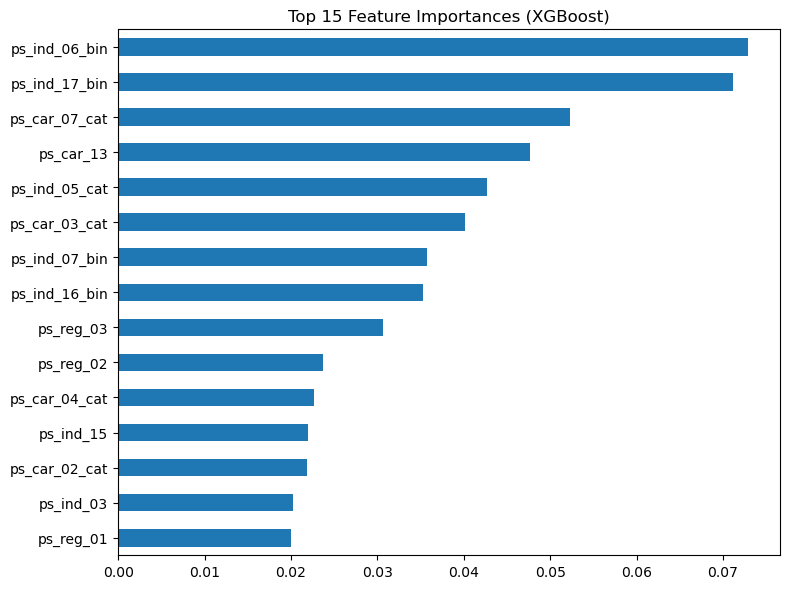

In [22]:
if best_model_name == "XGBoost":
    import matplotlib.pyplot as plt
    
    importances = best_model.feature_importances_
    feat_imp = pd.Series(importances, index=X.columns)
    top_features = feat_imp.sort_values(ascending=False).head(15).sort_values()

    plt.figure(figsize=(8,6))
    top_features.plot(kind='barh')
    plt.title("Top 15 Feature Importances (XGBoost)")
    plt.tight_layout()
    plt.show()


Report on Challenges Faced:

Challenge 1 — Imbalanced Target
Class distribution skewed
Used SMOTE and class_weight
Compared strategies

Challenge 2 — Large Dataset (595k rows)
Computational cost
Used RandomizedSearch instead of GridSearch
Limited folds to 5

Challenge 3 — No Feature Names
Hard to interpret business meaning
Used feature importance to infer patterns

Challenge 4 — Threshold Selection
Avoided test leakage
Used CV-based threshold optimization


Suggestions:

Use the model to rank customers by purchase probability and focus only on the top 10–20% highest-scoring customers instead of mass marketing.
Adjust the decision threshold depending on campaign cost and expected revenue. If outreach cost is high, increase threshold to improve precision.
